In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('stops.xlsx')

In [3]:
df.head(5)

stop_id stop_code                    stop_name  stop_desc   stop_lat  \
0   107518      2261  Devonshire Mall at Cineplex        NaN  42.273689   
1     1511      1048    Howard at Devonshire Mall        NaN  42.273960   
2     1657      1046       Howard at Grand Marais        NaN  42.279555   
3     1270      1044            Howard at Charles        NaN  42.281755   
4     1555      1042        Howard at Edinborough        NaN  42.283304   

    stop_lon  zone_id  stop_url  location_type  parent_station  \
0 -82.999922      NaN       NaN              0             NaN   
1 -83.004843      1.0       NaN              0             NaN   
2 -83.008455      1.0       NaN              0             NaN   
3 -83.009881      1.0       NaN              0             NaN   
4 -83.010859      1.0       NaN              0             NaN   

   wheelchair_boarding  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

<AxesSubplot:xlabel='stop_lon', ylabel='stop_lat'>

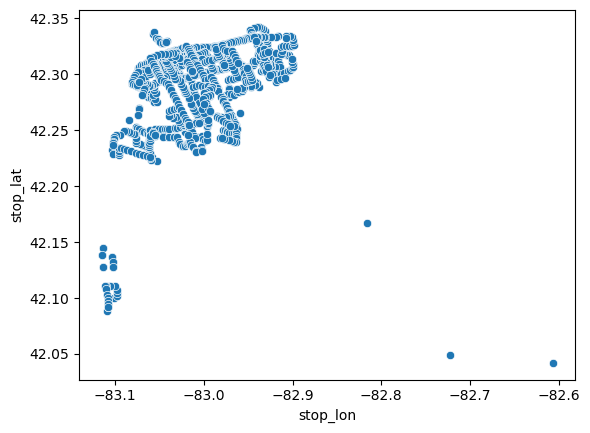

In [4]:
sns.scatterplot(x='stop_lon', y='stop_lat', data=df)

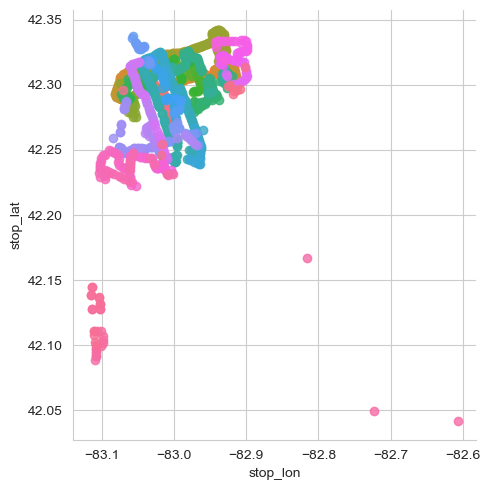

In [5]:
sns.set_style('whitegrid')
sns.lmplot(x='stop_lon', y='stop_lat', data=df, fit_reg=False, hue='stop_name', legend=False)
plt.show()

In [6]:
import folium
from folium.plugins import MarkerCluster

# create map and display it
map = folium.Map(location=[df['stop_lat'].mean(), df['stop_lon'].mean()], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
stops = MarkerCluster().add_to(map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.stop_lat, df.stop_lon, df.stop_name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(stops)

# display map
map

In [7]:
# export map as png
map.save('map.html')

In [8]:
from IPython.display import display
display(map)

In [9]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              1270 non-null   int64  
 1   stop_code            1270 non-null   object 
 2   stop_name            1270 non-null   object 
 3   stop_desc            0 non-null      float64
 4   stop_lat             1270 non-null   float64
 5   stop_lon             1270 non-null   float64
 6   zone_id              1266 non-null   float64
 7   stop_url             0 non-null      float64
 8   location_type        1270 non-null   int64  
 9   parent_station       0 non-null      float64
 10  wheelchair_boarding  1270 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 109.3+ KB


0

In [10]:
import plotly.express as px
fig = px.scatter_mapbox(df, lat="stop_lat", lon="stop_lon", hover_name="stop_name", hover_data=["stop_id"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [11]:
fig = px.scatter_mapbox(df, lat="stop_lat", lon="stop_lon", color="stop_name", zoom=10, height=300)
fig.update_layout(mapbox_style="mapbox://styles/mapbox/dark-v10")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [12]:
fig1 = px.scatter_mapbox(df, lat="stop_lat", lon="stop_lon", color="stop_name",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="mapbox://styles/mapbox/dark-v10")

# scatter map using the Mapbox Outdoors style
fig2 = px.scatter_mapbox(df, lat="stop_lat", lon="stop_lon", color="stop_name",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="mapbox://styles/mapbox/outdoors-v11")

# Show both figures
fig1.show()
fig2.show()